In [1]:
from funcoes import *
import geopandas as gpd

%load_ext autoreload
%autoreload 2


In [28]:
anos = range(1985, 2025)
anos_numericos = np.array(anos)  
gdf = gpd.read_file("../input_data/bh_lago_paranoa_31983.geojson")
gdf['uh_label'] = gdf['uh_label'].apply(lambda row: row.split("  ")[-1])
gdf = gdf.sort_values("uh_label")
zonas = gdf['uh_label'].tolist()
zonas = gdf['uh_label'].tolist()
print(f"Zonas encontradas: {gdf['uh_label'].tolist()}")  # Assumindo que há uma coluna 'nome'

Zonas encontradas: ['Córrego Bananal', 'Lago Paranoá', 'Riacho Fundo', 'Ribeirão do Gama', 'Ribeirão do Torto']


In [29]:
suffix_name = 'QF'
variavel = "Escoamento superficial"

## PARA A BACIA HIDROGRÁFICA TODA

In [30]:
medias, media_geral, stats = calculo_media_bh(anos, suffix_name)
print(medias.max(), medias.min())
medias


Resultados para QF:
- Média geral: 387.72 mm
- Coeficiente de variação: 17.6%
- Desvio-padrão geral: 491.3
502.69354 235.33365


array([347.62335, 235.33365, 342.30917, 368.29156, 438.5829 , 297.42963,
       408.37537, 485.28348, 307.73373, 359.88852, 383.98056, 301.32812,
       387.15915, 383.55292, 348.8027 , 399.54922, 340.71057, 332.41162,
       296.91202, 459.53885, 502.69354, 492.21597, 304.5956 , 483.8423 ,
       468.01797, 361.49542, 418.97647, 391.59128, 452.40128, 435.63367,
       348.13574, 337.5786 , 366.54932, 460.16507, 381.10367, 490.01633,
       497.5472 , 330.98672, 301.25607, 459.23325], dtype=float32)

In [31]:
medias, media_geral, stats = calculo_media_bh(anos, suffix_name, gdf)
print(medias.max(), medias.min())
medias


Resultados para QF:
- Média geral: 387.79 mm
- Coeficiente de variação: 17.6%
- Desvio-padrão geral: 491.4
502.75183 235.49547


array([347.83563, 235.49547, 342.51877, 368.47455, 438.808  , 297.57254,
       408.57397, 485.46838, 307.78412, 359.97833, 384.0776 , 301.4254 ,
       387.23193, 383.6022 , 348.83508, 399.59442, 340.73456, 332.4469 ,
       296.9314 , 459.5726 , 502.75183, 492.28876, 304.62088, 483.87408,
       468.0955 , 361.54984, 419.02148, 391.65582, 452.43802, 435.67133,
       348.16345, 337.61932, 366.58435, 460.2084 , 381.13885, 490.0072 ,
       497.5422 , 330.9702 , 301.22263, 459.2081 ], dtype=float32)

In [32]:
anos_validos = stats['anos_processados']
medias_validas = medias
resultados = analise_tendencia(anos_validos, medias_validas, "Bacia do Lago Paranoá")

Análise de Tendência para Bacia do Lago Paranoá (1985-2024)
----------------------------------------
Regressão Linear:
 • Inclinação: 1.86 mm/ano (↑ aumento)
 • p-valor: 0.048 (significativo)
 • R²: 0.10 (explica 10% da variabilidade)
Teste de Mann-Kendall:
 • Tendência: no trend (p=0.116)
 • Sen's Slope: 1.87 mm/ano
Análise por Subperíodos:
 • 1985-1999: 2.54 mm/ano (p=0.508)
 • 2000-2023: 0.63 mm/ano (p=0.751)


In [33]:
resultados

{'local': 'Bacia do Lago Paranoá',
 'n_anos': 40,
 'periodo': '1985-2024',
 'media_geral': 387.78986,
 'slope': 1.8596587290236024,
 'intercept': -3339.89606637078,
 'p_value': 0.047850094878034655,
 'r2': 0.09912170407276864,
 'mk_trend': 'no trend',
 'mk_p': 0.11574436842983582,
 'sen_slope': 1.8688030242919922,
 'slope_pre2000': 2.5387013026646206,
 'p_pre2000': 0.50784538297217,
 'slope_post2000': 0.6290991445688101,
 'p_post2000': 0.7505513058142187,
 'dados': {'anos': array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
         1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
         2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
         2018, 2019, 2020, 2021, 2022, 2023, 2024]),
  'medias': array([347.83563, 235.49547, 342.51877, 368.47455, 438.808  , 297.57254,
         408.57397, 485.46838, 307.78412, 359.97833, 384.0776 , 301.4254 ,
         387.23193, 383.6022 , 348.83508, 399.59442, 340.73456, 332.4469 ,
         2

In [34]:
#plot_medias_bh_simples(resultados, variavel, suffix_name)

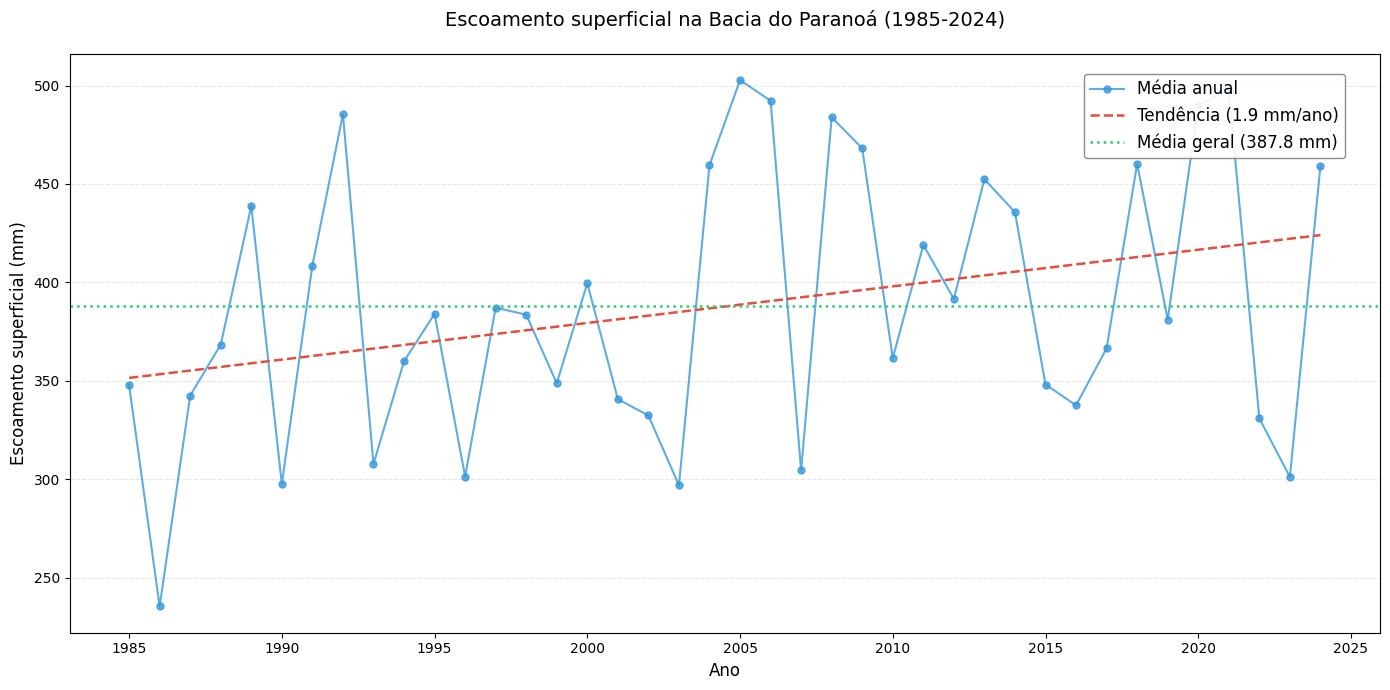

In [35]:
%reload_ext autoreload
plot_medias_bh(resultados, variavel, suffix_name)

## POR UNIDADE HIDROGRÁFICA

In [36]:
resultados = calcular_medias_zonas_paranoa(gdf, anos, suffix_name, zona_column='uh_label')


=== Estatísticas Descritivas ===
| Zona              |   Média Geral (mm) |   CV (%) |   Variação Anual (±mm) | Anos Processados   |
|:------------------|-------------------:|---------:|-----------------------:|:-------------------|
| Córrego Bananal   |             201.78 |     18.2 |                  395.4 | 40/40              |
| Lago Paranoá      |             571.04 |     17.3 |                  519.3 | 40/40              |
| Riacho Fundo      |             587.3  |     20.6 |                  471.3 | 40/40              |
| Ribeirão do Gama  |             229.3  |     19.4 |                  390.7 | 40/40              |
| Ribeirão do Torto |             162.78 |     16.7 |                  386.2 | 40/40              |

=== Análise de Tendências ===
| Zona              |   Tendência (mm/ano) |   p-valor |   R² |   Sen's Slope | Mann-Kendall         |
|:------------------|---------------------:|----------:|-----:|--------------:|:---------------------|
| Córrego Bananal   |        

In [37]:
resultados = calcular_medias_zonas_paranoa_temp(gdf, anos, suffix_name, zona_column='uh_label')
tendencias = analise_tendencia_por_zona(resultados)


In [38]:
#plot_tendencias_zonas_simples(tendencias, variavel, suffix_name)

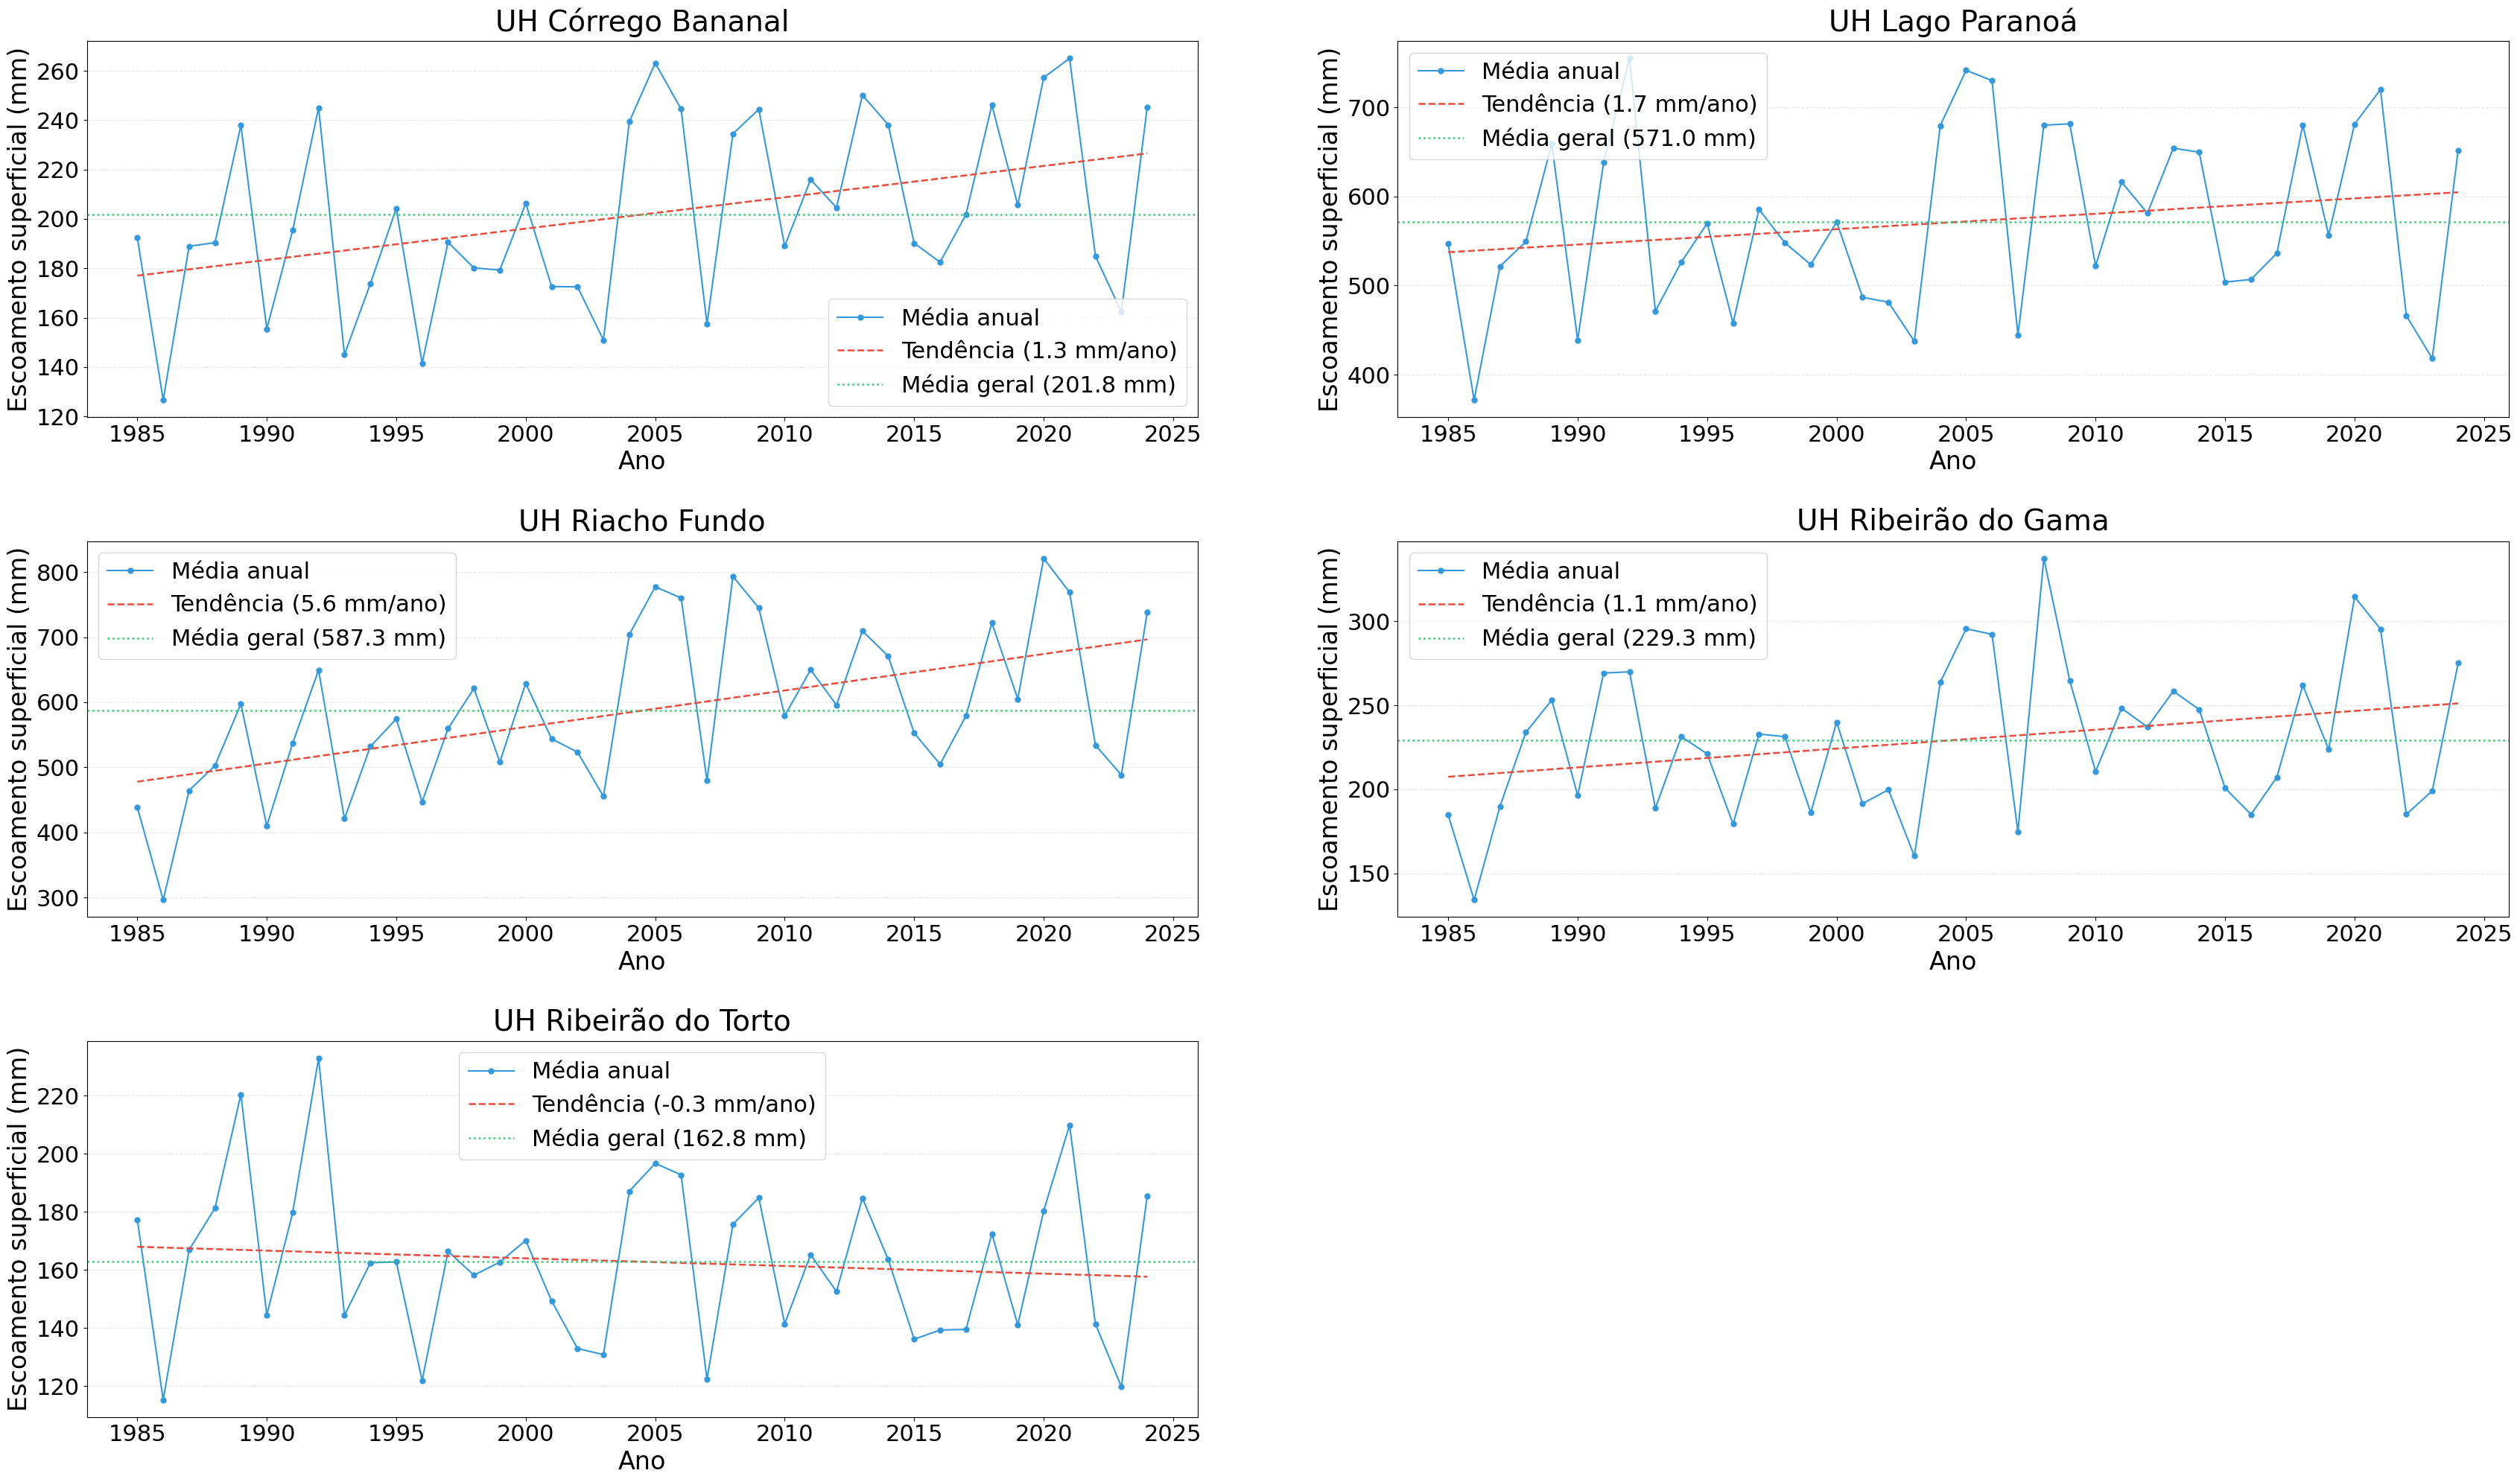

In [39]:
%reload_ext autoreload
plot_tendencias_zonas(tendencias, variavel, suffix_name)

In [59]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def conta_zero_bh(anos, gdf_corte=None):   
    anos_plot = []
    zeros_percent_plot = []
    for ano in anos:
        caminho_tif = os.path.join(
            './final', 
            str(ano), 
            'tfa500_alpha0.0833_beta1_gamma1_flowMFD', 
            f'B_{ano}_tfa500_alpha0.0833_beta1_gamma1_flowMFD.tif'
        )
        
 
        with rasterio.open(caminho_tif) as src:
            if gdf_corte is not None:
                gdf_corte = gdf_corte.to_crs(src.crs)
                dados_recortados, _ = mask(src, gdf_corte.geometry, crop=True, nodata=src.nodata)
                dados = dados_recortados[0]  # Pega a primeira banda
            else:
                dados = src.read(1)
            
            nodata = src.nodata
            mask_valido = ~np.isnan(dados)
            if nodata is not None:
                mask_valido = mask_valido & (dados != nodata)
            
            dados_validos = dados[mask_valido]
            zeros_count = np.sum(dados_validos == 0)
            total_pixels = dados_validos.size
            zeros_percentage = (zeros_count / total_pixels) * 100 if total_pixels > 0 else 0
            anos_plot.append(ano)
            zeros_percent_plot.append(zeros_percentage)
            
    plt.figure(figsize=(10, 6))

    # Gráfico de linhas
    plt.plot(anos_plot, zeros_percent_plot, 'bo-', label='% de Zeros')
    
    # Linha de tendência
    x_num = np.array([i for i in range(len(anos_plot))])
    slope, intercept, r_value, p_value, std_err = linregress(x_num, zeros_percent_plot)
    trend_line = intercept + slope * x_num
    
    plt.plot(anos_plot, trend_line, 'r--', label=f'Tendência {intercept} ({slope})')
    
    # Configurações do gráfico
    plt.title('Porcentagem de Zeros ao Longo dos Anos')
    plt.xlabel('Ano')
    plt.ylabel('Porcentagem de Zeros (%)')
    plt.legend()
    plt.grid(True)
    
    # Ajustar eixos para mostrar apenas anos inteiros
    plt.xticks(anos_plot, rotation=45)
    
    plt.tight_layout()
    plt.show()


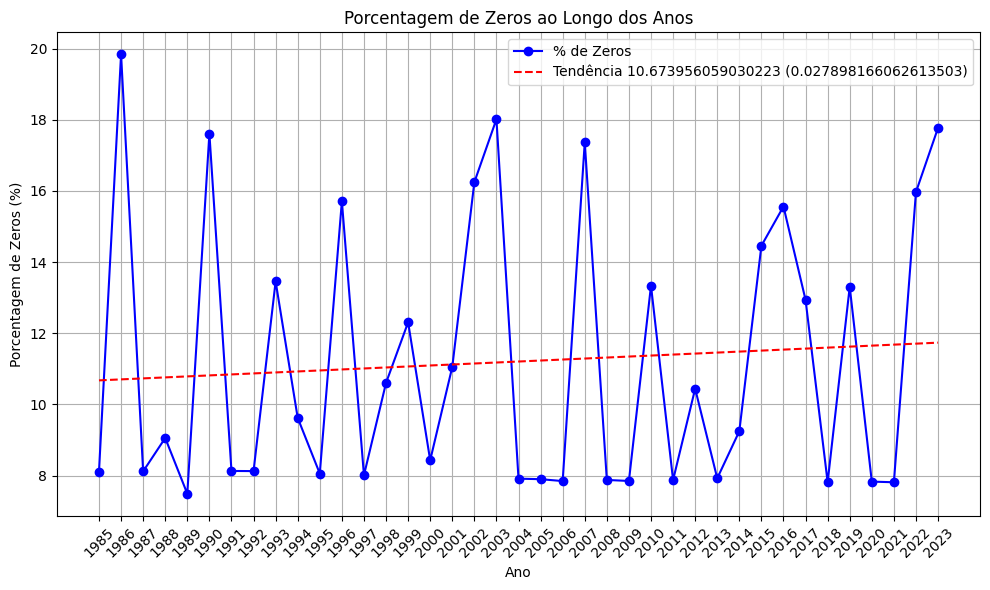

In [60]:
conta_zero_bh(anos, gdf)

In [65]:
def conta_zero_bh_por_uh(anos, gdf):
    # Obtém a lista de UHs únicas
    uhs = gdf['uh_label'].unique()
    
    # Cria uma única figura
    plt.figure(figsize=(12, 8))
    
    # Define cores diferentes para cada UH
    cores = plt.cm.tab10(np.linspace(0, 1, len(uhs)))
    
    for idx, uh in enumerate(uhs):
        # Filtra o gdf para a UH atual
        gdf_uh = gdf[gdf['uh_label'] == uh]
        
        anos_plot = []
        zeros_percent_plot = []
        
        for ano in anos:
            caminho_tif = os.path.join(
                './final', 
                str(ano), 
                'tfa500_alpha0.0833_beta1_gamma1_flowMFD', 
                f'B_{ano}_tfa500_alpha0.0833_beta1_gamma1_flowMFD.tif'
            )
            
            try:
                with rasterio.open(caminho_tif) as src:
                    gdf_uh = gdf_uh.to_crs(src.crs)
                    dados_recortados, _ = mask(src, gdf_uh.geometry, crop=True, nodata=src.nodata)
                    dados = dados_recortados[0]
                    
                    nodata = src.nodata
                    mask_valido = ~np.isnan(dados)
                    if nodata is not None:
                        mask_valido = mask_valido & (dados != nodata)
                    
                    dados_validos = dados[mask_valido]
                    zeros_count = np.sum(dados_validos == 0)
                    total_pixels = dados_validos.size
                    zeros_percentage = (zeros_count / total_pixels) * 100 if total_pixels > 0 else 0
                    
                    anos_plot.append(ano)
                    zeros_percent_plot.append(zeros_percentage)
                    
            except Exception as e:
                print(f"Erro ao processar ano {ano} para UH {uh}: {str(e)}")
                continue
        
        # Plot para a UH atual
        linha, = plt.plot(anos_plot, zeros_percent_plot, 'o-', color=cores[idx], label=f'UH {uh}')
        
        # Linha de tendência e equação
        if len(anos_plot) > 1:
            x_num = np.array([i for i in range(len(anos_plot))])
            slope, intercept, r_value, p_value, std_err = linregress(x_num, zeros_percent_plot)
            trend_line = intercept + slope * x_num
            
            plt.plot(anos_plot, trend_line, '--', color=linha.get_color(), alpha=0.5)
            
            # Adiciona equação no gráfico
            eq_text = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}'
            plt.text(0.02, 0.95 - idx*0.05, f'UH {uh}: {eq_text}', 
                    transform=plt.gca().transAxes,
                    color=linha.get_color(),
                    bbox=dict(facecolor='white', alpha=0.7))
    
    # Configurações do gráfico
    plt.title('Porcentagem de Zeros por Unidade Hidrológica')
    plt.xlabel('Ano')
    plt.ylabel('Porcentagem de Zeros (%)')
    plt.legend(loc='upper right')
    
    # Configura a grade (apenas linhas horizontais)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Ajusta os ticks do eixo x
    plt.xticks(anos, rotation=45)
    
    plt.tight_layout()
    plt.show()

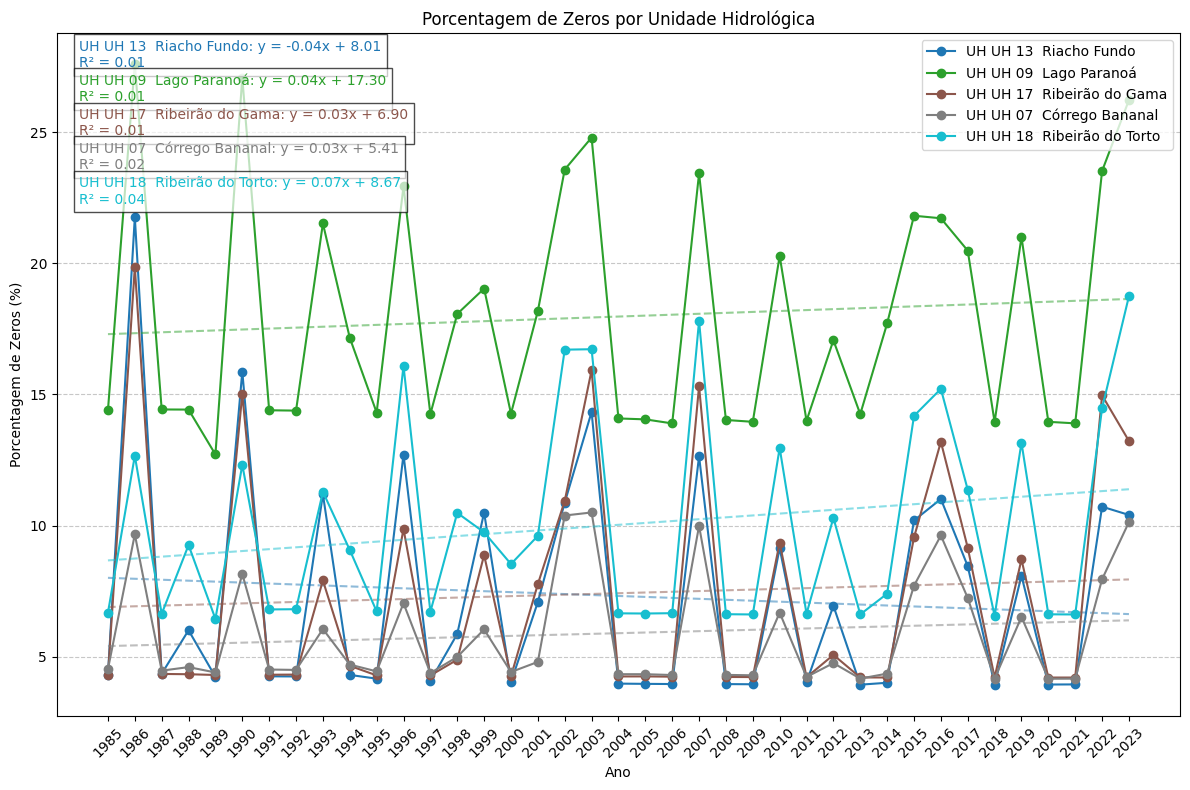

In [66]:
conta_zero_bh_por_uh(anos, gdf) 